# 미니프로젝트 : 얼굴인식 스티커를 이용한 캣벤져스

이전에는 얼굴인식을 이용하여 이미지에서 얼굴을 찾고 왕관 스티커를 적용하였다.  
참고 링크 : [EP03_Face_Recognition_Sticker_Application](https://github.com/jaejunlee96/AIFFEL-Project/blob/91372dc43e7aeac824337edf5a74af5e4e432af4/Exploration/EP03_Face_Recognition_Sticker_Application.ipynb)

그것을 응용하여 이번에는 다양한 인물, 다양한 각도의 이미지들에 얼굴인식을 진행하겠다.


영화를 좋아하는 사람이라면 누구나 알만한 마블의 __어벤져스__ !  
어벤져스는 지구를 지키는 최강 영웅들에 대한 내용이다.  

지구를 지켜야하는 의무를 가진 영웅인 만큼, 진지하고 근엄한 표정을 짓고있다. 

___why so serious?___

항상 진지.근엄한 우리 어벤져스 영웅들의 귀여운 모습을 찾아주자.

얼굴인식 스티커를 이용해 마블의 어벤져스에 등장하는 영웅들에게 귀여운 고양이 수염을 달아서 __캣벤져스__ 로 만들어보겠다.

![image](https://user-images.githubusercontent.com/84179578/126270287-5550751a-27d7-446e-87e4-61ccf2e37f72.png)

----

#### 참고 :설명을 하기 위해 단계별로 함수를 새로 정의했다. 따라서 새로 정의된 함수의 이전 단계 함수와 겹치는 부분이 많다.
  
    
    


## 사용할 모듈 불러오기

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

## 사진 불러오기

먼저 어벤져스 영웅 6명 (아이언맨, 캡틴아메리카, 토르, 헐크, 블랙위도우, 호크아이) 의 증명사진을 EP03_data 폴더 내에 각각  
(avengers_iron_man.jpg, avengers_captain_america.jpg, avengers_thor.jpg, avengers_hulk.jpg, avengers_black_widow.jpg, avengers_hawkeye.jpg) 로 저장했다.

영웅별로 다른 파일명 부분을 `hero_list` 에 저장하자.

In [2]:
hero_list = ['iron_man', 'captain_america', 'thor', 'hulk', 'black_widow', 'hawkeye']

사진을 불러오기 위한 `get_img` 함수를 정의하자.

- `get_img(영웅이름, 가로길이, 세로길이)` :  opencv 를 이용하여 이미지를 읽어서 인자로 받은 resize 할 가로길이, 세로 길이값으로 resize 한다. 이후 BGR 값을 RGB 값으로 변환하여 불러온 이미지를 출력한다.


In [3]:
def get_img(name, width, height):
    my_image_path =f'EP03_data/avengers_{name}.jpg'
    img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
    img_bgr = cv2.resize(img_bgr, (width, height))    # width x height 의 크기로 Resize
    img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # BGR 값을 RGB로 변환
    plt.imshow(img_rgb)
    plt.show()

    print(f'{width}x{height} 크기의 {name} 사진 불러오기 완료!')

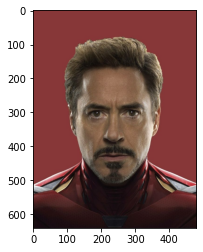

480x640 크기의 iron_man 사진 불러오기 완료!


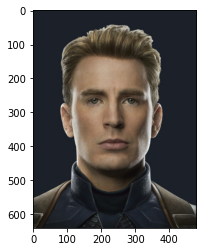

480x640 크기의 captain_america 사진 불러오기 완료!


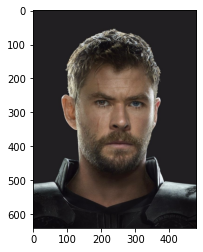

480x640 크기의 thor 사진 불러오기 완료!


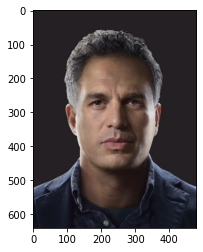

480x640 크기의 hulk 사진 불러오기 완료!


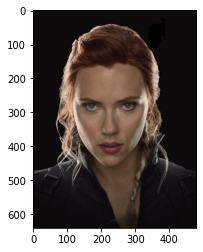

480x640 크기의 black_widow 사진 불러오기 완료!


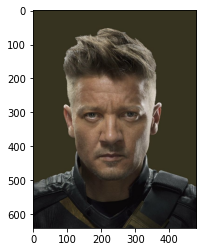

480x640 크기의 hawkeye 사진 불러오기 완료!


In [4]:
for name in hero_list:
    get_img(name,480,640)   # 480 x 640 크기의 이미지로 resize 해서 불러옴

## 얼굴 영역 찾기

얼굴 영역을 찾기 위한 `find_face` 함수를 정의하자. (위의 사진 불러오기 과정이 포함되어있음)

- `get_img(영웅이름, 가로길이, 세로길이)` :  opencv 를 이용하여 이미지를 읽어서 인자로 받은 resize 할 가로길이, 세로 길이값으로 resize 한다. 이후 BGR 값을 RGB 값으로 변환하여 불러온 이미지를 출력한다.

In [5]:
def find_face(name, width, height):

    my_image_path =f'EP03_data/avengers_{name}.jpg'
    img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
    img_bgr = cv2.resize(img_bgr, (width, height))    # width x height 의 크기로 Resize
    img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # BGR 값을 RGB로 변환


    detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

    dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show_rgb)
    plt.show()

    print(f'얼굴 찾기 완료!  얼굴 영역 좌표 : {dlib_rects}')

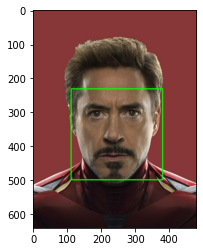

얼굴 찾기 완료!  얼굴 영역 좌표 : rectangles[[(111, 231) (379, 498)]]


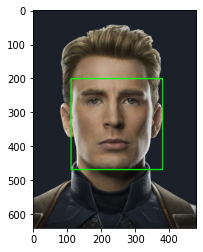

얼굴 찾기 완료!  얼굴 영역 좌표 : rectangles[[(111, 201) (379, 468)]]


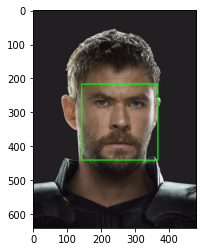

얼굴 찾기 완료!  얼굴 영역 좌표 : rectangles[[(142, 217) (365, 440)]]


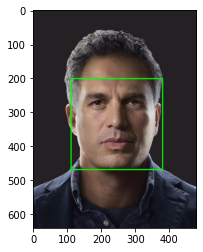

얼굴 찾기 완료!  얼굴 영역 좌표 : rectangles[[(111, 201) (379, 468)]]


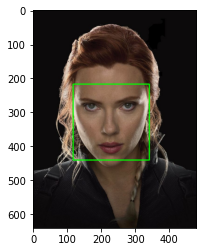

얼굴 찾기 완료!  얼굴 영역 좌표 : rectangles[[(117, 217) (340, 440)]]


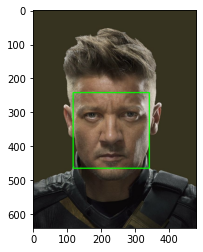

얼굴 찾기 완료!  얼굴 영역 좌표 : rectangles[[(117, 242) (340, 464)]]


In [6]:
for name in hero_list:
    find_face(name,480,640)   # 480 x 640 크기의 이미지로 resize 해서 불러온 이미지 얼굴 영역을 찾음

## 얼굴 랜드마크 face landmark

Dlib의 제공되는 모델을 사용해 잘라진 얼굴 이미지에서 아래 68개의 이목구비 위치를 찾는 함수를 정의하자.



In [7]:
def find_landmark(name, width, height):

    my_image_path =f'EP03_data/avengers_{name}.jpg'
    img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
    img_bgr = cv2.resize(img_bgr, (width, height))    # width x height 의 크기로 Resize
    img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # BGR 값을 RGB로 변환


    detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

    dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
        

    model_path = 'EP03_data/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)         # 저장된 landmark 모델 불러오기
    
    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

        for landmark in list_landmarks:
            for idx, point in enumerate(landmark):
                cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

        img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
        plt.imshow(img_show_rgb)
        plt.show()

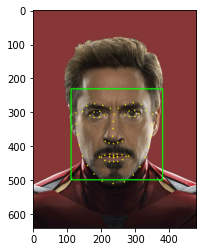

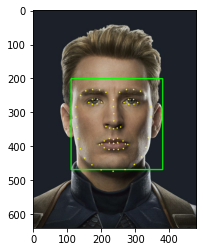

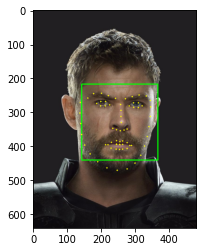

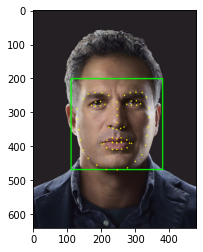

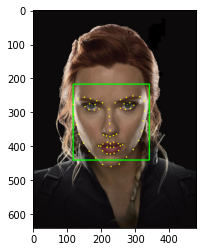

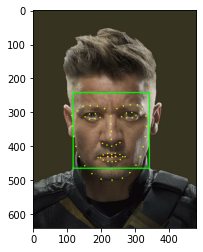

In [8]:
for name in hero_list:
    find_landmark(name,480,640)

## 스티커 적용

먼저 귀여운 고양이 수염 스티커의 파일주소를 `sticker_path` 에 저장하고 스티커 사진을 불러와보자.

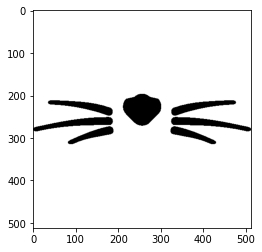

In [9]:
sticker_path = 'EP03_data/cat-whisker.png'

sticker_bgr = cv2.imread(sticker_path )    #- OpenCV로 이미지를 읽어서
sticker_rgb = cv2.cvtColor(sticker_bgr, cv2.COLOR_BGR2RGB)  # BGR 값을 RGB로 변환
plt.imshow(sticker_rgb)
plt.show()

귀엽다.

이제 찾은 랜드마크에서 적절한 위치에 스티커를 붙이는 `sticker()` 함수를 만들어보자.  

수염의 중앙은 양쪽 볼의 가운데 지점이다.  또한 볼의 위치는 귀, 코, 눈, 입 의 가운데 지점이다.  
이것을 이용해 수염의 위치를 지정해주겠다.

In [10]:
def sticker(name, width, height):

    my_image_path =f'EP03_data/avengers_{name}.jpg'
    img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
    img_bgr = cv2.resize(img_bgr, (width, height))    # width x height 의 크기로 Resize
    img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # BGR 값을 RGB로 변환


    detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

    dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
        

    model_path = 'EP03_data/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)         # 저장된 landmark 모델 불러오기
    
    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

        for landmark in list_landmarks:
            for idx, point in enumerate(landmark):
                cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        
        
        x_list = [landmark[2][0], landmark[30][0], landmark[36][0], landmark[48][0],   # 왼쪽 귀, 코, 눈, 입
                  landmark[14][0], landmark[30][0], landmark[45][0], landmark[54][0]]   # 오른쪽 귀, 코 , 눈, 입 의 좌표
        y_list = [landmark[2][1], landmark[30][1], landmark[36][1], landmark[48][1],
                  landmark[14][1], landmark[30][1], landmark[45][1], landmark[54][1]]
        
        x = int(np.mean(x_list)) # 각 지점의 가운데 점
        y = int(np.mean(y_list))

        w = dlib_rect.width()
        h = dlib_rect.width()
        
    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w,h))
    
    refined_x = x - w // 2    # left
    refined_y = y - h // 2    # top
    

    
    sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    
    img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
   
    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.show()

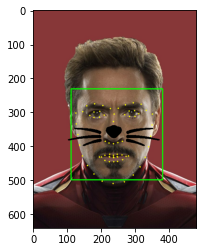

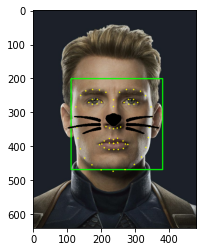

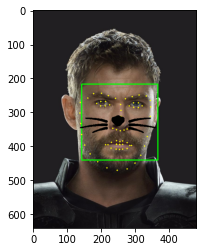

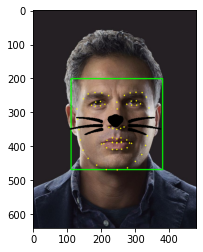

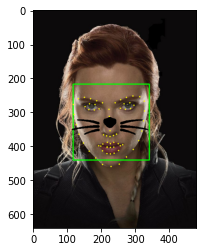

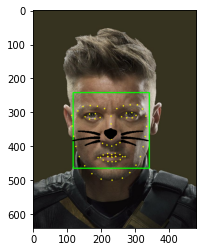

In [11]:
for name in hero_list:
    sticker(name,480,640)

## 캣벤져스 최종 출력

이제 마지막으로 img_show 대신,  img_rgb 를 활용하여 bounding box와 landmark를 제거하고 최종 결과만 출력하는  
최종적으로 완성된 함수 `cat_avengers` 함수를 정의하자.

In [12]:
def cat_avengers(name, width, height):

    my_image_path =f'EP03_data/avengers_{name}.jpg'
    img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
    img_bgr = cv2.resize(img_bgr, (width, height))    # width x height 의 크기로 Resize
    img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # BGR 값을 RGB로 변환


    detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

    dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
        

    model_path = 'EP03_data/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)         # 저장된 landmark 모델 불러오기
    
    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

        for landmark in list_landmarks:
            for idx, point in enumerate(landmark):
                cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        
        x_list = [landmark[2][0], landmark[30][0], landmark[36][0], landmark[48][0],   # 왼쪽 귀, 코, 눈, 입
                  landmark[14][0], landmark[30][0], landmark[45][0], landmark[54][0]]   # 오른쪽 귀, 코 , 눈, 입 의 좌표
        y_list = [landmark[2][1], landmark[30][1], landmark[36][1], landmark[48][1],
                  landmark[14][1], landmark[30][1], landmark[45][1], landmark[54][1]]
        
        x = int(np.mean(x_list)) # 각 지점의 가운데 점
        y = int(np.mean(y_list))

        w = dlib_rect.width()
        h = dlib_rect.width()
        
    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w,h))

    
    refined_x = x - w // 2    # left
    refined_y = y - h // 2    # top
   
    sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    
    img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)


    
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show()
    


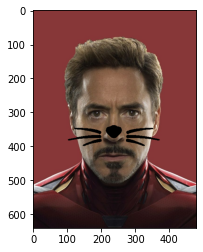

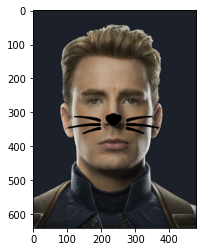

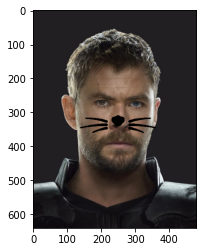

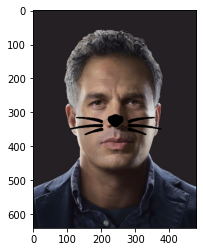

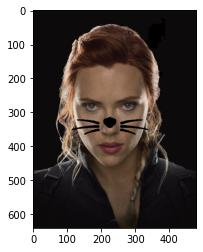

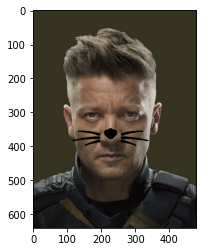

In [13]:
for name in hero_list:
    cat_avengers(name,480,640)

__다들 너무 귀여워지셨네요!__

----

##  다양한 모습의 얼굴 인식

위에서는 어벤져스의 증명사진에 고양이 스티커를 추가했다.

하지만 어벤져스는 실제로 가만히 서 있을때 보다 여러 행동들을 하고 있을 때가 많다.

위에서 정의한 함수를 이용하여 다양한 모습의 이미지에 얼굴 인식 모델을 적용해서 스티커를 적용해보자.

### 1. 얼굴 일부가 가려진 이미지

![image](https://user-images.githubusercontent.com/84179578/126629179-1b96ab7b-bf15-41e9-ace4-3c925765ba7f.png)

위와 같이 얼굴의 일부만 가려졌을때는 얼굴 인식이 잘되지만  

가려진 부위가 많으면 얼굴 영역을 찾을 수 없었다.


### 2. 다양한 각도의 이미지

![image](https://user-images.githubusercontent.com/84179578/126631138-bf8dc830-1738-4241-a9c2-0cae62a448f5.png)

위와 같이 얼굴의 각도가 조금만 틀어졌을때에는 얼굴 인식이 되어 해당 영역에 스티커가 적용이 되었다.  
하지만 스티커 이미지는 그에 맞게 회전되지않고 그대로 수평적으로 적용이 되었다. 얼굴이 회전된만큼 스티커도 회전되는 기능의 필요성이 있다.

90도 회전시킨 이미지, 얼굴의 완전 옆모습은의 이미지는 얼굴 영역이 인식되지 않았다.

### 3. 어두운 밝기의 이미지
![image](https://user-images.githubusercontent.com/84179578/126634127-1b6a3533-21be-47e4-b1a2-70fe2cf020a8.png)

어두운 밝기의 이미지는 생각보다 얼굴 인식이 잘되었다.  

스티커색이 이미지색과 비슷하여 잘 안보여 이미지에 얼굴 영역, 랜드마크, 스티커를 같이 적용했다.

## 4. 다양한 거리의 이미지

![image](https://user-images.githubusercontent.com/84179578/126636330-0a51ab21-5b31-4842-909d-5227933bf2b5.png)

아주 가까운 거리의 얼굴 이미지는 (위의 예시에서는) 밝기가 있을때만 인식이 되었다.  

또한 먼 거리에 있는 얼굴은 인식이 안되는 것을 확인했다.

## 프로젝트 정리

다양한 이미지들을 통해 얼굴 인식 과정을 경험해보았다.  

증명사진과 같은 눈,코,입이 정면으로 확실히 나와있는 이미지의 경우는 아무 문제없이 얼굴 인식이 진행되었고,  해당 얼굴의 특정 위치에 스티커 이미지를 적용하는 기능이 원활히 진행되었다.  

하지만 다양한 각도, 밝기, 거리 등의 이미지에서는 얼굴 인식이 잘 안되는 문제가 발생하였다.  
또한 해당 얼굴의 특정 위치에 적용되어야할 스티커 이미지가 원본 이미지의 각도가 바뀌면서, 적절하지 않은 위치에 적절하지 않은 각도로 적용되는 문제를 발견하였다.

이를 해결하기위해서는 더 다양한 각도의 얼굴을 찾을 수 있는 모델, 얼굴이 회전하면 적용되어야할 스티커 이미지 또한 같이 회전되어야하는 기능의 필요성을 느꼈다.


### 기대효과

이러한 얼굴 인식 모델을 활용하면 실생활에 다양하게 적용할 수 있을 것이다.  
간단한 예로, 마스크를 쓴 사람과 쓰지 않은 사람들 구별하여 마스크를 쓰지 않은사람에게 경고음을 들려줄 수 있을 것이다.  


더 나아가, 얼굴을 인식하여 이미지와의 유사도를 측정할 수 있다면,  
주점에 들어갈때 주민등록증과 본인의 얼굴이 일치하는지를 사람이 일일히 확인해야하는 일을 얼굴 인식 기능을 통해 해당 주민등록증과 얼마나 일치하는지를 자동으로 확인 할 수도 있을 것이다.